# K-means Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster

In [2]:
%matplotlib inline

## Step 1: Input Data

In [19]:
movies = pd.read_csv("./data/movie_hist.csv")

In [20]:
movies

,user,movie_01,movie_02,movie_03,movie_04
0,john,5,5,2,1
1,mary,4,5,3,2
2,bob,4,4,4,3
3,lisa,2,2,4,5
4,lee,1,2,3,4
5,harry,2,1,5,5


## Step 2: EDA

In [9]:
#### 

## Step 3: Data Preprocessing

In [10]:
data = movies.drop('user',axis=1)

## Step 4: Clustering

### Step 4-1: model initialization

In [21]:
k_means = cluster.KMeans(n_clusters=3, init='random', max_iter=50, random_state=1)

#k_means = cluster.KMeans(n_clusters=3, init='k-means++', max_iter=50, random_state=1)

### Step 4-2: model generation

In [22]:
k_means.fit(data) 

KMeans(init='random', max_iter=50, n_clusters=3, random_state=1)

### Step 4-3: clustering result

In [24]:
# K-Clusters

labels = k_means.labels_
pd.DataFrame(labels, index=movies.user, columns=['Cluster ID'])

,Cluster ID
user,
john,1
mary,1
bob,0
lisa,2
lee,2
harry,2


In [25]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,movie_01,movie_02,movie_03,movie_04
0,4.000000,4.000000,4.0,3.000000
1,4.500000,5.000000,2.5,1.500000
2,1.666667,1.666667,4.0,4.666667


## Step 5: Determine the number of clusters

Text(0, 0.5, 'SSE')

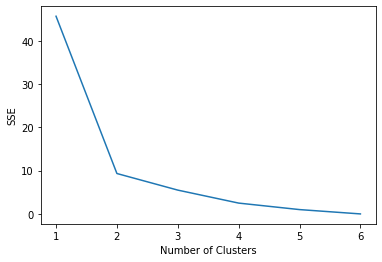

In [15]:
numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_) # Sum of squared distances of samples to their closest cluster center

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

## Step 6: Applications for Classification

In [16]:
k_means = cluster.KMeans(n_clusters=2, init='k-means++', max_iter=50, random_state=1).fit(data)

In [17]:
# Test data

testData = pd.read_csv("./data/movie_newusers.csv")
testData

,user,movie_01,movie_02,movie_03,movie_04
0,paul,4,5,1,2
1,kim,3,2,4,4
2,liz,2,3,4,1
3,tom,3,2,3,3
4,bill,5,4,1,4


In [18]:
predict_labels = k_means.predict(testData.drop('user',axis=1))
predict_labels = predict_labels.reshape(-1,1)
cols = testData.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((testData, predict_labels), axis=1),columns=cols)
newusers

,user,movie_01,movie_02,movie_03,movie_04,Cluster ID
0,paul,4,5,1,2,1
1,kim,3,2,4,4,0
2,liz,2,3,4,1,1
3,tom,3,2,3,3,0
4,bill,5,4,1,4,1
